## mse

mse:

$h = c_{p}T + gz + L_{v}q$

<br />
development of squared anomaly of vertically integrated mse:

<br />


$\textcolor{lightblue}{\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \text{NetSW} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

<br />

$h ^ \prime$ - moist static energy anomaly from the domain mean \
$\delta t$ - one day





In [ ]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from funcs.vars.myPlots import *

In [ ]:
model='MPI-ESM1-2-HR'
experiment_id='historical'

In [ ]:
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (time: 10957, lat: 64, lon: 384)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Data variables:
    mse      (time, lat, lon) float64 ...

### snapshots

In [ ]:
mse = ds.mse
mse

<xarray.DataArray 'mse' (time: 10957, lat: 64, lon: 384)>
[269279232 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    units:

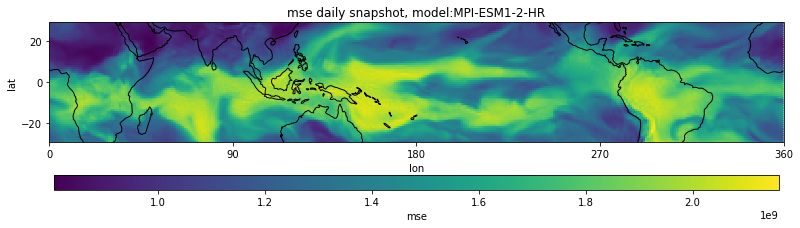

In [ ]:
plot_snapshot(mse.isel(time=0), 'viridis', 'mse daily', model)

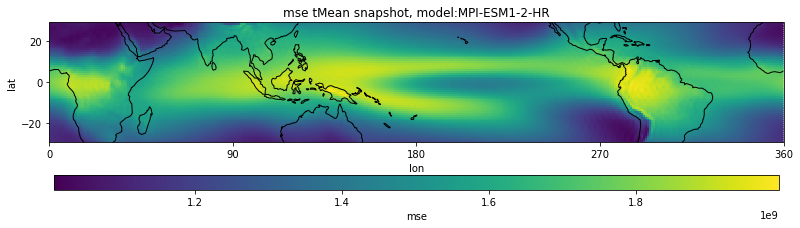

In [ ]:
plot_snapshot(mse.mean(dim='time'), 'viridis', 'mse tMean', model)

In [ ]:
mse_sMean = mse.mean(dim=('lat','lon'))
print(np.shape(mse_sMean))

(10957,)


In [ ]:
mse_anom = mse - mse_sMean
print(np.shape(mse_anom))

(10957, 64, 384)


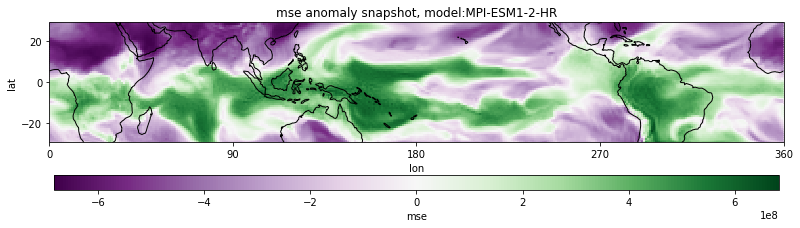

In [ ]:
plot_snapshot(mse_anom.isel(time=0), 'PRGn', 'mse anomaly', model)

In [ ]:
mse_anomSqrd = mse_anom**2

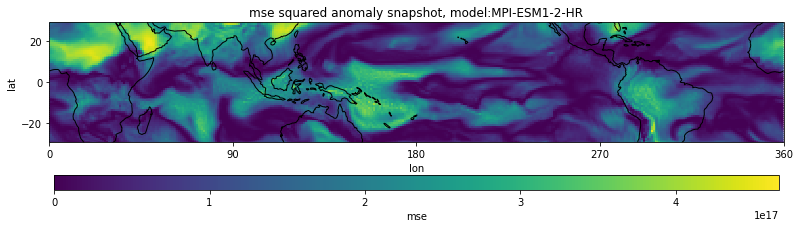

In [ ]:
plot_snapshot(mse_anomSqrd.isel(time=0), 'viridis', 'mse squared anomaly', model)

### mse variance

In [ ]:
mse_var = mse_anomSqrd.mean(dim=('lat','lon'))

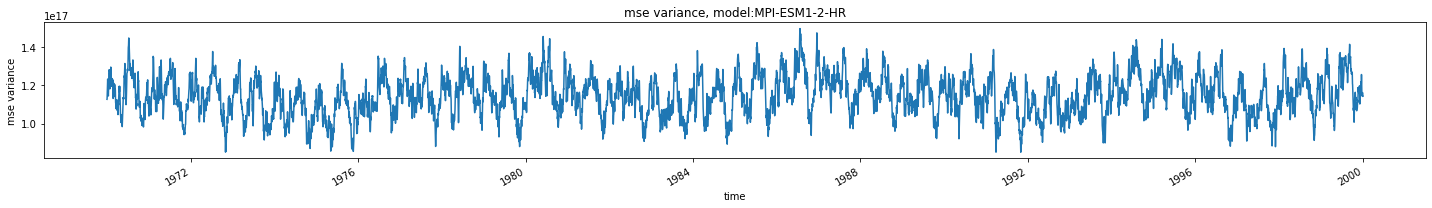

In [ ]:
plot_timeseries(mse_var, 'mse variance', model)

### $\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}}$

In [ ]:
dmse = mse_anomSqrd.isel(time=slice(1,None)).data-mse_anomSqrd.isel(time=slice(0,-1)).data
np.shape(dmse)

(10956, 64, 384)

In [ ]:
dmse = xr.DataArray(
    data=dmse,
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anomSqrd.time.data[0:-1], 'lat': mse_anomSqrd.lat.data, 'lon': mse_anomSqrd.lon.data},
    attrs={'units':''}
    )

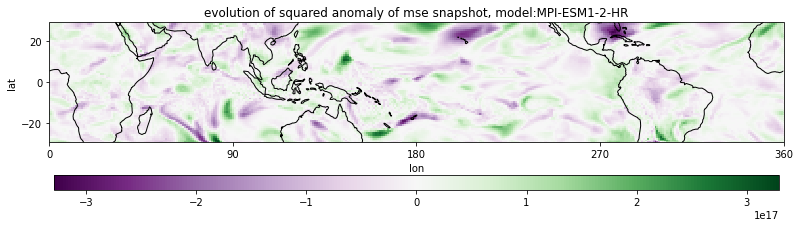

In [ ]:
plot_snapshot(dmse.isel(time=0), 'PRGn', 'evolution of squared anomaly of mse', model)

In [ ]:
dmse_var = dmse.mean(dim=('lat','lon'))/2

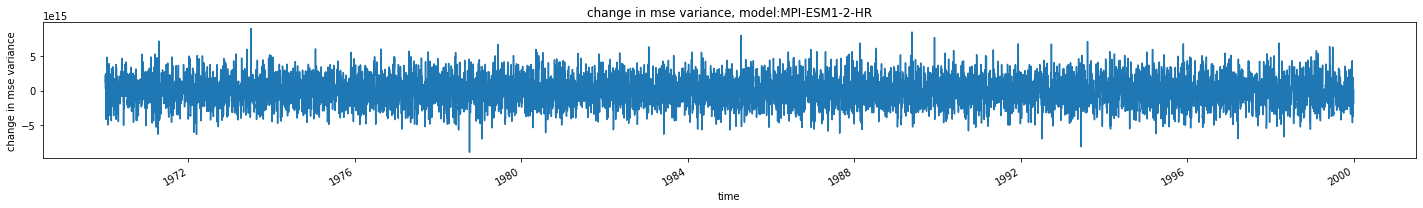

In [ ]:
plot_timeseries(dmse_var, 'change in mse variance', model)